## Introduction

The purpose of this data analysis is to determine in which city it rains more. The measures for how we determine this will range from the average rainfall to the frequency of rainfall. Each person has their own subjective definition of what "a lot" of rain is; therefore, we will attempt to provide all necessary information and analysis to adequately answer each persons' definition.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
import statistics

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and New York (or other locations of interest) for the 3 year period January 2020 - January 2024.

To follow the data preperation process, follow this link to a Google Colab notebook: https://colab.research.google.com/drive/17AqI1lxnThX_EDbGi9SbKmIdRm4Cl8kT?usp=sharing

For complete viewing, please refer to my [Github repository](https://github.com/nrg-frogusa/Seattle-Weather), which will contain all relevant source files, data prep, and conclusion material.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/clean_seattle_nyc_weather.csv')

In [5]:
df.head(10)

,date,city,precipitation,month,year
0,2020-01-01,NYC,0.00,1,2020
1,2020-01-02,NYC,0.00,1,2020
2,2020-01-03,NYC,0.13,1,2020
3,2020-01-04,NYC,0.16,1,2020
4,2020-01-05,NYC,0.00,1,2020
5,2020-01-06,NYC,0.03,1,2020
6,2020-01-07,NYC,0.03,1,2020
7,2020-01-08,NYC,0.00,1,2020
8,2020-01-09,NYC,0.00,1,2020
9,2020-01-10,NYC,0.00,1,2020


In [6]:
df.tail(10)

,date,city,precipitation,month,year
2912,2023-12-22,SEA,0.67,12,2023
2913,2023-12-23,SEA,0.00,12,2023
2914,2023-12-24,SEA,0.00,12,2023
2915,2023-12-25,SEA,0.59,12,2023
2916,2023-12-26,SEA,0.09,12,2023
2917,2023-12-27,SEA,0.10,12,2023
2918,2023-12-28,SEA,0.05,12,2023
2919,2023-12-29,SEA,0.00,12,2023
2920,2023-12-30,SEA,0.10,12,2023
2921,2023-12-31,SEA,0.00,12,2023


##### $\rightarrow$ List your questions about the data that will help you solve the problem.

 - What is the average precipitation in each city for the whole duration (2020-2024)?
 - What is the frequency of rainfall (above 0.25in) in each city for the whole duration?
 - During which months each year is average rainfall below 1 inches in each city?
 - Which city has a higher chance of deviating from the average? Meaning, in which city can I trust the average more?

## Analysis

In [21]:
# Answers the "what is the rainfall in each city for the whole duration" question.
df.groupby('city')['precipitation'].mean()

city
NYC    0.118207
SEA    0.105921
Name: precipitation, dtype: float64

In [20]:
# Answers the "which city has the higher chance of deviating from the average rainfall readings" question.
df.groupby('city')['precipitation'].std()

city
NYC    0.359260
SEA    0.237903
Name: precipitation, dtype: float64

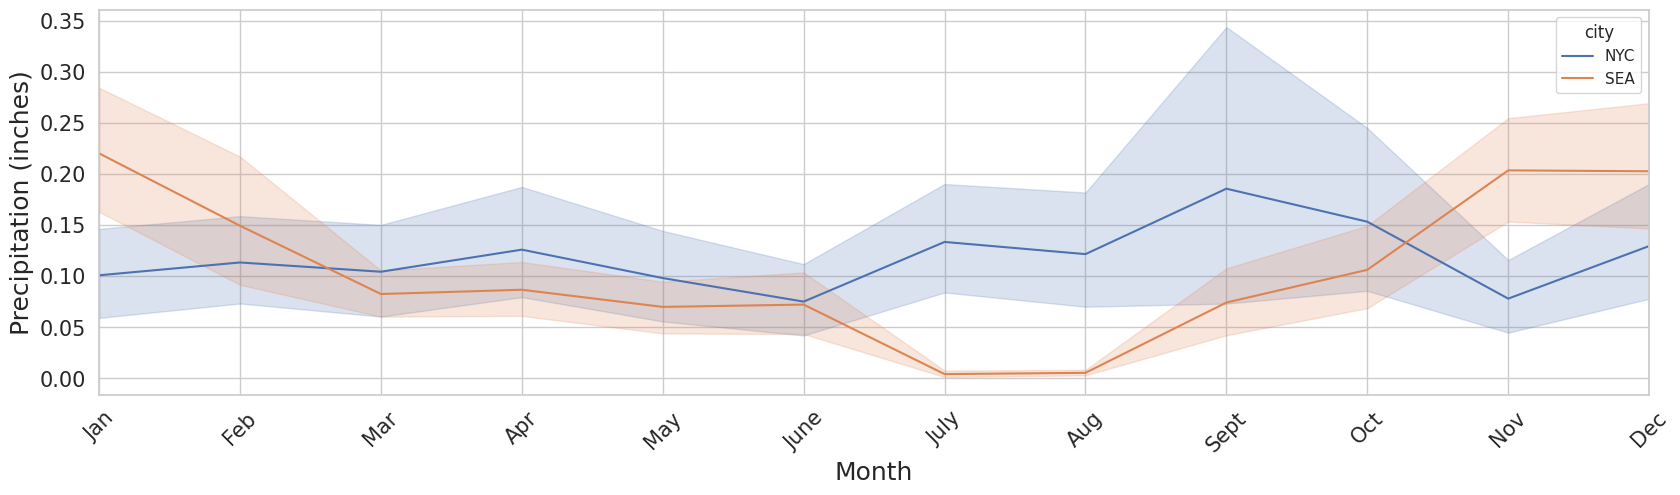

In [22]:
# Using this plot we can get a better idea of during which months is most or least rainy in each city.
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.xlim(1, 12)
plt.tick_params(labelsize=15);
# This plot basically acts as a visualization of the above tables by taking mean and standard deviation into account.

(0.0, 100.0)

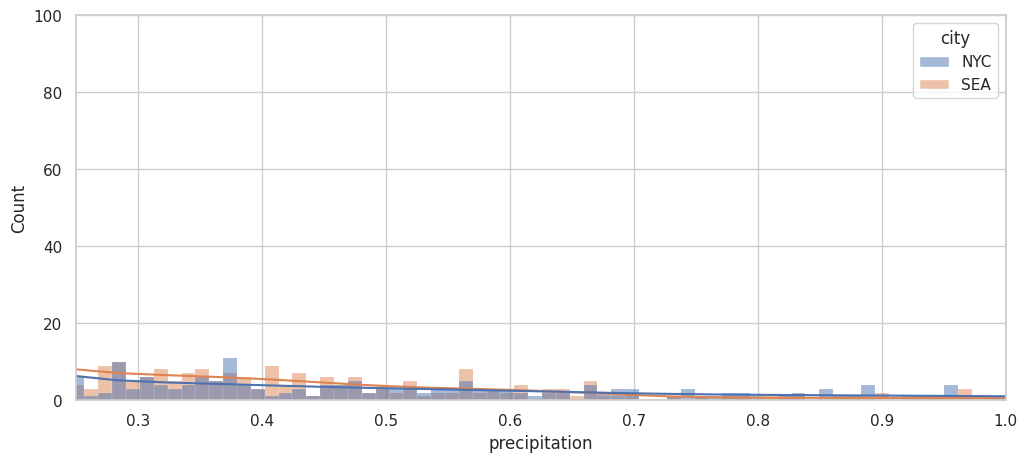

In [28]:
# This plot answers the "What is the frequency of rainfall (above 0.25in) in each city for the whole duration" question.
plt.figure(figsize=(12, 5))
h = sns.histplot(data=df, x="precipitation", hue="city", bins="auto", kde=True)
plt.xlim(0.25, 1)
plt.ylim(0,100)
# Here we can see that it is uncommon for rain to exceed 0.25 inches and does not happen at a high frequency. This is 4 years of data, so I expected the totals to be higher.

### Results for communication assignment

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

## Conclusion

Provide a brief description of your conclusions.

From answering my initial questions and visualizing some relationships, I find that New York rains more than Seattle. New York has a higher average precipitation across the 4 years and greater standard deviation, meaning the rainfall in a given month will deviate from the average at a higher magnitude. Furthermore, my first plot shows that the average rainfall of New York is greater than Seattle's from mid-February all the way to early October. Also, the lower bound of the confidence interval (95%) of New York is less than the lower bound of the confidence interval of Seattle for only 4-5 months out of the year, on average.

As for my last plot, it can be said that the kde lines for frequency of rainfall greater than 0.25 inches in Seattle and New York are similar. I'd consider this analysis of frequency to be pretty neutral.

Therefore, the evidence and analyses I've produced adequately convinces me that Professor Egan's family should visit Seattle more often since it rain "more" in New York.